In [26]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import copy
import zipfile
import os
import rasterio 
from rasterio.plot import show





ModuleNotFoundError: No module named 'seaborn'

In [9]:
                    #DESCOMPRIMIR ARCHIVO Y GUARDAR LAS IMAGENES

#Definir como variable la ruta del archivo a descomprimir

ruta_archivo_zip = 'C:/Users/juli/Documents/Documentos/Maestria/Planning/TrabajoFinal/Los-Molinos_2023-08-02_7_all_bands.zip'

# Directorio de destino para la descompresión
Imagen = 'C:/Users/juli/Documents/Documentos/Maestria/Planning/TrabajoFinal/Trabajo_Final/Imagen'


# Crear directorio de destino si no existe
if not os.path.exists(Imagen):
    os.makedirs(Imagen)
    
# Descomprimir el archivo ZIP
with zipfile.ZipFile(ruta_archivo_zip, 'r') as zip_ref:
    zip_ref.extractall(Imagen)

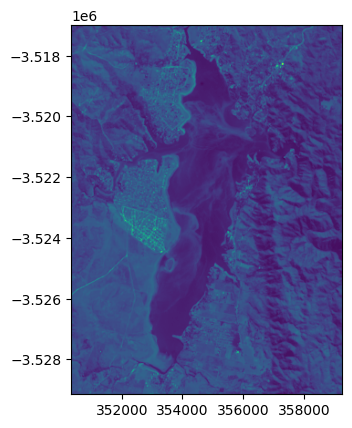

[[ 9659  9764  9721 ...  8925  8835  9105]
 [ 9618  9473  9798 ...  8882  8856  8835]
 [ 9738  9351  9241 ...  8948  8847  8738]
 ...
 [10012 10040  9898 ...  9624 10267 10548]
 [ 9866  9804  9447 ...  9341 10052 10640]
 [ 9563  9567  9314 ...  8967  9931 10551]]


In [10]:

#ABRIR LA IMAGEN DE LA BANDA 3 Y LEER SUS DATOS

ruta_bandas = 'C:/Users/juli/Documents/Documentos/Maestria/Planning/TrabajoFinal/Trabajo_Final/Imagen/'

Green = "GREEN_B3.tif"

ruta_banda3 = ruta_bandas + Green

B3 = rasterio.open(ruta_banda3)
rasterio.plot.show (B3)

#datos_banda3 = B3.read(1)

with rasterio.open(ruta_banda3) as src:
    datos_banda3 = src.read(1)

print (datos_banda3)



In [23]:
#ESTADÍSTICA DESCRIPTIVA DE BANDA 3

cantidad_elementos = datos_banda3.size
print("Cantidad total de elementos en la matriz:", cantidad_elementos)

min_value = np.min(datos_banda3)
max_value = np.max(datos_banda3)
mean_value = np.mean(datos_banda3)
median_value = np.median(datos_banda3)
std_dev = np.std(datos_banda3)

# Imprimir los resultados
print("Valor mínimo:", min_value)
print("Valor máximo:", max_value)
print("Valor promedio:", mean_value)
print("Valor mediano:", median_value)
print("Desviación estándar:", std_dev)

def calcular_percentiles(datos_banda3):
    perc_5 = np.percentile(datos_banda3, 5)
    perc_95 = np.percentile(datos_banda3, 95)
    return perc_5, perc_95

#AVERIGUAR SI LA MATRIZ ES DE TIPO FLOAT O NO 

type(datos_banda3)
if datos_banda3.dtype == float:
    print("La matriz es de tipo float.")
else:
    print("La matriz no es de tipo float.")

Cantidad total de elementos en la matriz: 120988
Valor mínimo: 7215
Valor máximo: 18480
Valor promedio: 9436.035284491023
Valor mediano: 9474.0
Desviación estándar: 863.3266639231139
La matriz no es de tipo float.


In [12]:
#AL NO SER DE TIPO FLOAT, SE CONVIERTE EN FLOAT PARA ENMASCARAR NAN: -BANDA 3-.
matrizfloatB3 = datos_banda3.astype(float)
print (matrizfloatB3)

#chequeo si se convirtió a float o no

type(matrizfloatB3)
if matrizfloatB3.dtype == float:
    print("La matriz es de tipo float.")
else:
    print("La matriz no es de tipo float.")

[[ 9659.  9764.  9721. ...  8925.  8835.  9105.]
 [ 9618.  9473.  9798. ...  8882.  8856.  8835.]
 [ 9738.  9351.  9241. ...  8948.  8847.  8738.]
 ...
 [10012. 10040.  9898. ...  9624. 10267. 10548.]
 [ 9866.  9804.  9447. ...  9341. 10052. 10640.]
 [ 9563.  9567.  9314. ...  8967.  9931. 10551.]]
La matriz es de tipo float.


In [74]:
#CALCULO DE PERCENTILES PARA VER OUTLIERS -BANDA 3-.

percentil_5 = np.nanpercentile(matrizfloatB3, 5)
percentil_95 = np.nanpercentile(matrizfloatB3, 95)


outliers = matrizfloatB3[(matrizfloatB3 < percentil_5) | (matrizfloatB3 > percentil_95)]

cantidad_outliers = len(outliers)

print("Cantidad de outliers:", cantidad_outliers)

print (outliers)

#Detectar la ubicación de los outliers en la matriz para enmascararlos:

outliers_indices = np.where((matrizfloatB3 < percentil_5) | (matrizfloatB3 > percentil_95))

matrizfloatB3[outliers_indices] = np.nan


print (matrizfloatB3[outliers_indices])


Cantidad de outliers: 2
[0.46631077 0.4686512 ]
[nan nan]


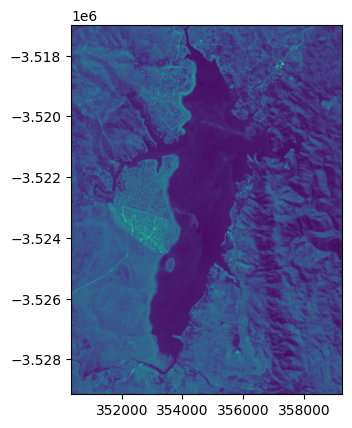

In [14]:
#APERTURA Y LECTURA DE BANDA 4

ruta_bandas = 'C:/Users/juli/Documents/Documentos/Maestria/Planning/TrabajoFinal/Trabajo_Final/Imagen/'

Red = "RED_B4.tif"

ruta_banda4 = ruta_bandas + Red

B4 = rasterio.open(ruta_banda4)
rasterio.plot.show (B4)

datos_banda4 = B4.read(1)

In [15]:
#ESTADÍSTICA DESCRIPTIVA DE BANDA 4

min_value = np.min(datos_banda4)
max_value = np.max(datos_banda4)
mean_value = np.mean(datos_banda4)
median_value = np.median(datos_banda4)
std_dev = np.std(datos_banda4)

# Imprimir los resultados
print("Valor mínimo:", min_value)
print("Valor máximo:", max_value)
print("Valor promedio:", mean_value)
print("Valor mediano:", median_value)
print("Desviación estándar:", std_dev)

#VER SI LA MATRIZ ES DE DATOS TIPO FLOAT O NO

if datos_banda4.dtype == float:
    print("La matriz es de tipo float.")
else:
    print("La matriz no es de tipo float.")

Valor mínimo: 7141
Valor máximo: 19967
Valor promedio: 9755.10831652726
Valor mediano: 9850.0
Desviación estándar: 1271.2236797643907
La matriz no es de tipo float.


In [34]:
#AL NO SER DE TIPO FLOAT, SE CONVIERTE EN FLOAT PARA ENMASCARAR OUTLIERS: -BANDA 4-.
matrizfloatB4 = datos_banda4.astype(float)
print (matrizfloatB4)

#chequeo si se convirtió a float o no

type(matrizfloatB4)
if matrizfloatB4.dtype == float:
    print("La matriz es de tipo float.")
else:
    print("La matriz no es de tipo float.")

[[10300. 10255. 10131. ...  8930.  9026.  9373.]
 [ 9905.  9799. 10240. ...  9116.  8973.  8949.]
 [10331.  9805.  9620. ...  9112.  8994.  8853.]
 ...
 [10686. 10664. 10368. ... 10183. 10983. 11381.]
 [10379. 10318. 10040. ...  9786. 10729. 11467.]
 [ 9873. 10116.  9929. ...  9381. 10587. 11351.]]
La matriz es de tipo float.


In [41]:
#CALCULO DE PERCENTILES PARA VER OUTLIERS -BANDA 4-.

percentil_5 = np.nanpercentile(matrizfloatB4, 5)
percentil_95 = np.nanpercentile(matrizfloatB4, 95)

outliers = matrizfloatB3[(matrizfloatB4 < percentil_5) | (matrizfloatB4 > percentil_95)]

cantidad_outliers = len(outliers)

print("Cantidad de outliers:", cantidad_outliers)

print (outliers)

#Detectar la ubicación de los outliers en la matriz:

outliers_indices = np.where((matrizfloatB4 < percentil_5) | (matrizfloatB4 > percentil_95))

matrizfloatB4[outliers_indices] = np.nan

print(matrizfloatB4[outliers_indices])


Cantidad de outliers: 6417
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]


In [ ]:
#CALCULO DE PERCENTILES PARA VER OUTLIERS -BANDA 4-.

percentil_5 = np.nanpercentile(matrizfloatB4, 5)
percentil_95 = np.nanpercentile(matrizfloatB4, 95)

outliers = matrizfloatB3[(matrizfloatB4 < percentil_5) | (matrizfloatB4 > percentil_95)]

cantidad_outliers = len(outliers)

print("Cantidad de outliers:", cantidad_outliers)

print (outliers)

#Detectar la ubicación de los outliers en la matriz:

outliers_indices = np.where((matrizfloatB4 < percentil_5) | (matrizfloatB4 > percentil_95))

matrizfloatB4[outliers_indices] = np.nan

print(matrizfloatB4[outliers_indices])


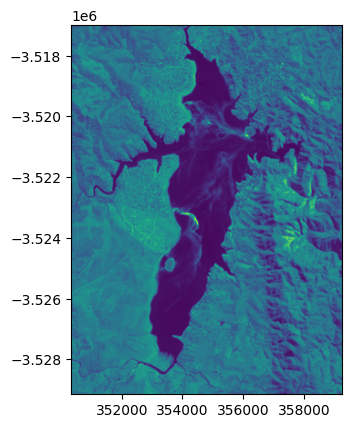

[[13495 13951 13667 ... 11744 11431 12245]
 [13157 12621 13654 ... 12091 11716 11498]
 [13043 12228 12330 ... 12002 11607 11488]
 ...
 [14485 14631 14403 ... 13460 15073 15946]
 [14340 14321 14057 ... 12976 14749 16002]
 [14118 14078 13713 ... 12078 14206 15863]]


In [16]:
#BANDA 5

ruta_bandas = 'C:/Users/juli/Documents/Documentos/Maestria/Planning/TrabajoFinal/Trabajo_Final/Imagen/'

NIR = "NIR_B5.tif"

ruta_banda5 = ruta_bandas + NIR

B5 = rasterio.open(ruta_banda5)
rasterio.plot.show (B5)

datos_banda5 = B5.read(1)

print(datos_banda5)




In [17]:
#ESTADISTICA DESCRIPTIVA BANDA 5

min_value = np.min(datos_banda5)
max_value = np.max(datos_banda5)
mean_value = np.mean(datos_banda5)
median_value = np.median(datos_banda5)
std_dev = np.std(datos_banda5)

# Imprimir los resultados
print("Valor mínimo:", min_value)
print("Valor máximo:", max_value)
print("Valor promedio:", mean_value)
print("Valor mediano:", median_value)
print("Desviación estándar:", std_dev)

#VER SI LA MATRIZ ES DE DATOS TIPO FLOAT O NO

if datos_banda5.dtype == float:
    print("La matriz es de tipo float.")
else:
    print("La matriz no es de tipo float.")



Valor mínimo: 7147
Valor máximo: 24850
Valor promedio: 12959.817568684497
Valor mediano: 13704.0
Desviación estándar: 2638.935982836838
La matriz no es de tipo float.


In [64]:
#AL NO SER DE TIPO FLOAT, SE CONVIERTE EN FLOAT PARA ENMASCARAR OUTLIERS: -BANDA 5-.
matrizfloatB5 = datos_banda5.astype(float)
print (matrizfloatB5)

#chequeo si se convirtió a float o no

type(matrizfloatB5)
if matrizfloatB5.dtype == float:
    print("La matriz es de tipo float.")
else:
    print("La matriz no es de tipo float.")

[[13495. 13951. 13667. ... 11744. 11431. 12245.]
 [13157. 12621. 13654. ... 12091. 11716. 11498.]
 [13043. 12228. 12330. ... 12002. 11607. 11488.]
 ...
 [14485. 14631. 14403. ... 13460. 15073. 15946.]
 [14340. 14321. 14057. ... 12976. 14749. 16002.]
 [14118. 14078. 13713. ... 12078. 14206. 15863.]]
La matriz es de tipo float.


In [65]:
#CALCULO DE PERCENTILES PARA VER OUTLIERS -BANDA 5-.

percentil_5 = np.nanpercentile(matrizfloatB5, 5)
percentil_95 = np.nanpercentile(matrizfloatB5, 95)

outliers = matrizfloatB5[(matrizfloatB5 < percentil_5) | (matrizfloatB5 > percentil_95)]

cantidad_outliers = len(outliers)

print("Cantidad de outliers:", cantidad_outliers)

print (outliers)

#Detectar la ubicación de los outliers en la matriz:

outliers_indices = np.where((matrizfloatB5 < percentil_5) | (matrizfloatB5 > percentil_95))

matrizfloatB5[outliers_indices] = np.nan

print(matrizfloatB5[outliers_indices])


Cantidad de outliers: 12071
[16552. 17391. 16351. ... 16553. 16517. 16262.]
[nan nan nan ... nan nan nan]


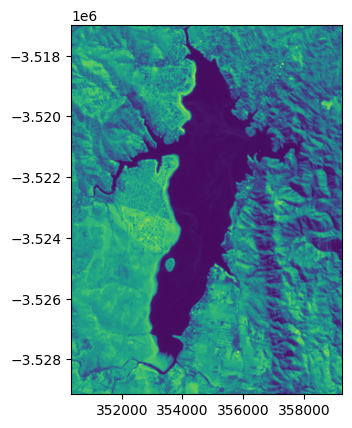

[[16330 17141 16660 ... 13386 13733 14550]
 [16174 15823 16728 ... 13842 13406 12918]
 [16395 15149 14822 ... 13868 13455 12631]
 ...
 [17962 17605 17049 ... 16513 19109 20705]
 [17360 16896 16283 ... 15373 17864 20465]
 [16010 16576 16787 ... 14223 17286 19924]]


In [4]:
#BANDA 6

ruta_bandas = 'C:/Users/juli/Documents/Documentos/Maestria/Planning/TrabajoFinal/Trabajo_Final/Imagen/'

SWIR_B6 = "SWIR_B6.tif"

ruta_banda6 = ruta_bandas + SWIR_B6

B6 = rasterio.open(ruta_banda6)
rasterio.plot.show (B6)

datos_banda6 = B6.read(1)

print(datos_banda6)



In [5]:
#ESTADISTICA DESCRIPTIVA BANDA 6

min_value = np.min(datos_banda6)
max_value = np.max(datos_banda6)
mean_value = np.mean(datos_banda6)
median_value = np.median(datos_banda6)
std_dev = np.std(datos_banda6)

# Imprimir los resultados
print("Valor mínimo:", min_value)
print("Valor máximo:", max_value)
print("Valor promedio:", mean_value)
print("Valor mediano:", median_value)
print("Desviación estándar:", std_dev)

#VER SI LA MATRIZ ES DE DATOS TIPO FLOAT O NO

if datos_banda6.dtype == float:
    print("La matriz es de tipo float.")
else:
    print("La matriz no es de tipo float.")

Valor mínimo: 7013
Valor máximo: 25515
Valor promedio: 14347.914173306444
Valor mediano: 15263.0
Desviación estándar: 3999.9244354439425
La matriz no es de tipo float.


In [66]:
#AL NO SER DE TIPO FLOAT, SE CONVIERTE EN FLOAT PARA ENMASCARAR OUTLIERS: -BANDA 6-.
matrizfloatB6 = datos_banda5.astype(float)
print (matrizfloatB6)

#chequeo si se convirtió a float o no

type(matrizfloatB6)
if matrizfloatB6.dtype == float:
    print("La matriz es de tipo float.")
else:
    print("La matriz no es de tipo float.")

[[13495. 13951. 13667. ... 11744. 11431. 12245.]
 [13157. 12621. 13654. ... 12091. 11716. 11498.]
 [13043. 12228. 12330. ... 12002. 11607. 11488.]
 ...
 [14485. 14631. 14403. ... 13460. 15073. 15946.]
 [14340. 14321. 14057. ... 12976. 14749. 16002.]
 [14118. 14078. 13713. ... 12078. 14206. 15863.]]
La matriz es de tipo float.


In [67]:
#CALCULO DE PERCENTILES PARA VER OUTLIERS -BANDA 6-.

percentil_5 = np.nanpercentile(matrizfloatB6, 5)
percentil_95 = np.nanpercentile(matrizfloatB6, 95)

outliers = matrizfloatB6[(matrizfloatB6 < percentil_5) | (matrizfloatB6 > percentil_95)]

cantidad_outliers = len(outliers)

print("Cantidad de outliers:", cantidad_outliers)

print (outliers)

#Detectar la ubicación de los outliers en la matriz:

outliers_indices = np.where((matrizfloatB6 < percentil_5) | (matrizfloatB6 > percentil_95))

matrizfloatB6[outliers_indices] = np.nan

print(matrizfloatB6[outliers_indices])


Cantidad de outliers: 12071
[16552. 17391. 16351. ... 16553. 16517. 16262.]
[nan nan nan ... nan nan nan]


[[2.26499673 2.16164282 2.22118191 ... 2.73743893 2.68690181 2.5403086 ]
 [2.28675558 2.33973751 2.20937948 ... 2.66572786 2.73946636 2.82503563]
 [2.2530517  2.43828571 2.49158459 ... 2.65673212 2.73195229 2.88469278]
 ...
 [2.05855437 2.09697956 2.16666048 ... 2.24383058 1.92994281 1.77195789]
 [2.13185925 2.18891386 2.2813836  ... 2.40770414 2.06777475 1.79106253]
 [2.31060102 2.23872547 2.22455078 ... 2.59939629 2.13767131 1.84292043]]


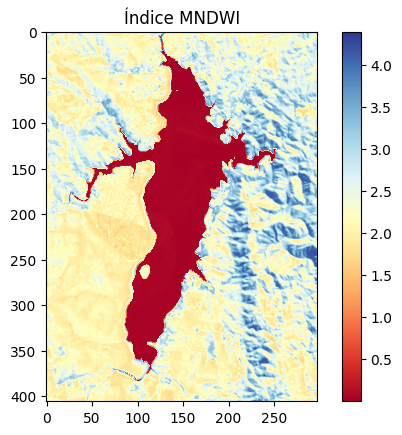

In [79]:
#CALCULO DE MNDWI: intente usar las bandas float, sin valores enmascarados. Pero me da error porque las dimensiones de
#las matrices son diferentes (segun cgpt matrizfloatB3 tiene una forma de (10, 10) y matrizfloatB6 tiene una forma de (406, 298)
#Por ende use las bandas originales, con valores enteros


#mndwi = (banda_verde - banda_swir) / (banda_verde + banda_swir)

MNDWI= (datos_banda3 - datos_banda6) / (datos_banda3 + datos_banda6)

print (MNDWI)

plt.imshow(MNDWI, cmap='RdYlBu')  # Puedes cambiar el mapa de color según tu preferencia
plt.colorbar()  # Agrega una barra de color para mostrar la escala de colores
plt.title('Índice MNDWI')
plt.show()

[[ True  True  True ...  True  True False]
 [ True  True  True ... False  True  True]
 [ True  True  True ... False  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]]


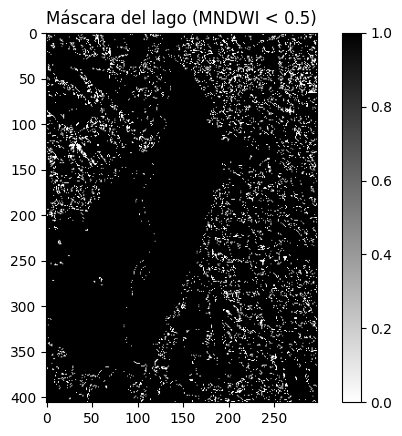

In [94]:
mascara_lago = MNDWI < 0.5
print (mascara_lago)
plt.imshow(mascara_lago, cmap='binary')  # cmap='binary' muestra True como blanco y False como negro
plt.title('Máscara del lago (MNDWI < 0.5)')
plt.colorbar()  # Agregar una barra de color para indicar los valores de la máscara
plt.show()

In [87]:
#NORMALIZO BANDA 3 
# Definir los valores estadísticos de tu banda
valor_minimo = 7215
valor_maximo = 18480

# Calcular la diferencia entre el valor máximo y el valor mínimo
rango = valor_maximo - valor_minimo

# Normalizar los valores de tu banda
banda_3normalizada = (datos_banda3 - valor_minimo) / rango
print (banda_3normalizada)

[[0.21695517 0.22627608 0.22245894 ... 0.1517976  0.14380826 0.1677763 ]
 [0.21331558 0.20044385 0.22929427 ... 0.14798047 0.14567244 0.14380826]
 [0.22396804 0.18961385 0.17984909 ... 0.15383933 0.1448735  0.13519751]
 ...
 [0.24829117 0.25077674 0.23817133 ... 0.2138482  0.27092765 0.29587217]
 [0.23533067 0.2298269  0.19813582 ... 0.18872614 0.25184199 0.30403906]
 [0.2084332  0.20878828 0.18632934 ... 0.15552597 0.24110075 0.29613848]]


In [89]:
#NORMALIZO BANDA 6
valor_minimo = 7013
valor_maximo = 25515

# Normalizar los valores de tu banda utilizando la escala Z-score
rango = valor_maximo - valor_minimo

banda_6normalizada = (datos_banda6 - valor_minimo) / rango
print (banda_6normalizada)

[[0.50356718 0.54740028 0.52140309 ... 0.34444925 0.36320398 0.40736137]
 [0.49513566 0.47616474 0.52507837 ... 0.36909523 0.34553021 0.31915469]
 [0.50708032 0.43973624 0.42206248 ... 0.37050049 0.34817858 0.30364285]
 ...
 [0.59177386 0.57247865 0.54242785 ... 0.513458   0.65376716 0.74002811]
 [0.55923684 0.53415847 0.50102692 ... 0.45184304 0.58647714 0.72705653]
 [0.48627175 0.51686304 0.52826721 ... 0.3896876  0.55523727 0.69781645]]


[[-3.90991053e-01 -5.10521980e-01 -4.44193989e-01 ... -4.42327961e+00
  -2.99842740e+01  5.37125884e-01]
 [-3.63090360e-01 -2.95727307e-01 -4.43681252e-01 ...  1.27659211e+01
  -4.24399368e+00 -2.34603376e+00]
 [-3.91183701e-01 -2.73446788e-02  2.05532801e-01 ...  8.08718668e+00
  -4.69767415e+00 -1.91958857e+00]
 ...
 [-5.68875210e-01 -5.29085875e-01 -4.78526723e-01 ... -4.33612133e-01
  -6.29176501e-01 -6.86106189e-01]
 [-5.23798702e-01 -4.69748761e-01 -4.18885322e-01 ... -1.51797269e-01
  -5.54608841e-01 -6.68322125e-01]
 [-3.31904728e-01 -4.54732938e-01 -5.31901881e-01 ...  1.50249283e+00
  -5.05756793e-01 -6.49578882e-01]]


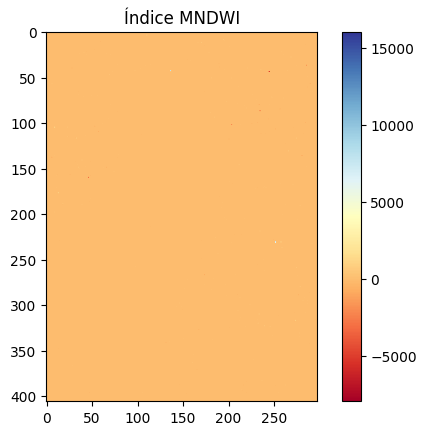

In [90]:
MNDWI= (banda_3normalizada - banda6_normalizada) / (banda_3normalizada + banda6_normalizada)

print (MNDWI)

plt.imshow(MNDWI, cmap='RdYlBu')  # Puedes cambiar el mapa de color según tu preferencia
plt.colorbar()  # Agrega una barra de color para mostrar la escala de colores
plt.title('Índice MNDWI')
plt.show()